In [1]:
import tensorflow.keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten ,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
seed = 569874
rng = np.random.RandomState(seed)
import matplotlib.pyplot as pylab
%matplotlib inline

C:\Users\asus\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train = pd.read_csv(os.path.join('', 'train.csv'))
test = pd.read_csv(os.path.join('', 'test.csv'))
sample= pd.read_csv(os.path.join('', 'Sample.csv'))
bb_train = pd.read_csv(os.path.join('', 'bbox_train.csv'))
train.head()

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [3]:
bb_train.head()

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202


In [4]:
test.head()

,Name
0,10005.jpg
1,10009.jpg
2,10015.jpg
3,10022.jpg
4,10023.jpg


In [68]:
test.shape

(2463, 1)

In [5]:
sample.head()

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


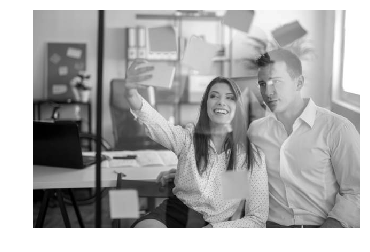

In [8]:
import matplotlib.pyplot as pylab
img_name = rng.choice(train.Name)
filepath = os.path.join('train', 'images', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [10]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/images/'+train['Name'][i],target_size=(160,160,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████| 5733/5733 [07:31<00:00, 16.71it/s]


In [11]:
X .shape

(5733, 160, 160, 3)

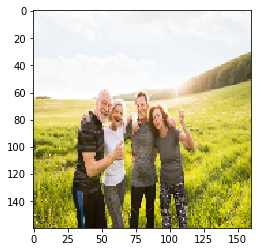

In [12]:
plt.imshow(X[4])

In [13]:
y = np.array(train.drop(['Name'],axis=1))
y.shape

(5733, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [19]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(160,160,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, kernel_initializer='normal'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 156, 156, 16)      1216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 78, 78, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 74, 74, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=15,verbose=2,shuffle=True)

Train on 4127 samples, validate on 459 samples
Epoch 1/30
4127/4127 - 450s - loss: 7.9698 - val_loss: 7.0805
Epoch 2/30
4127/4127 - 368s - loss: 6.6079 - val_loss: 6.1044
Epoch 3/30
4127/4127 - 318s - loss: 6.6269 - val_loss: 7.4952
Epoch 4/30
4127/4127 - 319s - loss: 6.3875 - val_loss: 6.8592
Epoch 5/30
4127/4127 - 323s - loss: 5.9319 - val_loss: 6.5343
Epoch 6/30
4127/4127 - 318s - loss: 6.0709 - val_loss: 7.8207
Epoch 7/30
4127/4127 - 320s - loss: 5.9083 - val_loss: 6.2259
Epoch 8/30
4127/4127 - 315s - loss: 5.5141 - val_loss: 7.0642
Epoch 9/30
4127/4127 - 317s - loss: 5.5368 - val_loss: 7.2161
Epoch 10/30
4127/4127 - 177s - loss: 5.0421 - val_loss: 5.6922
Epoch 11/30
4127/4127 - 171s - loss: 4.7395 - val_loss: 7.0053
Epoch 12/30
4127/4127 - 167s - loss: 4.3662 - val_loss: 5.3777
Epoch 13/30
4127/4127 - 168s - loss: 4.2483 - val_loss: 4.8712
Epoch 14/30
4127/4127 - 167s - loss: 3.7347 - val_loss: 5.9107
Epoch 15/30
4127/4127 - 167s - loss: 3.7642 - val_loss: 5.0055
Epoch 16/30
4127/

In [25]:
z = model.predict(X_test)

In [27]:
z = z.round()

In [39]:
DIC = {
    'Actual':list(y_test),
    'Predicted':list(z)
}

In [31]:
indice = range(0,len(z))

In [40]:
import pandas as pd
dtf = pd.DataFrame.from_dict(DIC)

In [57]:
dtf.head(5)

,Actual,Predicted,Sub
0,[2],[3.0],[-1.0]
1,[4],[3.0],[1.0]
2,[5],[4.0],[1.0]
3,[7],[4.0],[3.0]
4,[8],[4.0],[4.0]


In [48]:
dtf['Sub']=dtf['Actual']-dtf['Predicted']

In [22]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('train/images/'+test['Name'][i],target_size=(160,160,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
Xt = np.array(test_image)

100%|██████████████████████████████████████████████████████████████████████████████| 2463/2463 [02:40<00:00, 15.35it/s]


In [51]:
img = Xt[4]
img.shape

(160, 160, 3)

[[4.]]


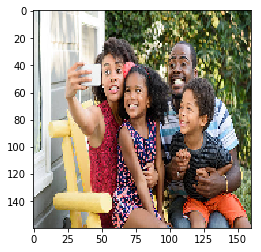

In [54]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,160,160,3))
print(proba.round())
plt.imshow(img)

[[5.]]


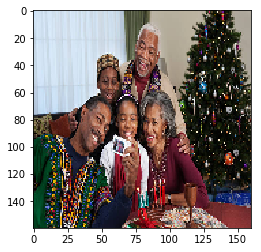

In [69]:
img = Xt[6]
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,160,160,3))
print(proba.round())
plt.imshow(img)

[[4.]]


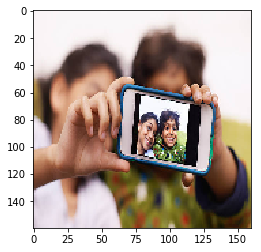

In [70]:
img = Xt[60]
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,160,160,3))
print(proba.round())
plt.imshow(img)

In [71]:
tot = range(0,test.shape[0])

[[3.]]


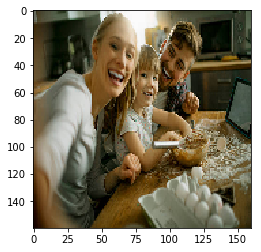

[[5.]]


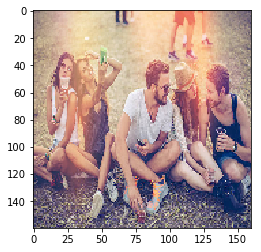

[[4.]]


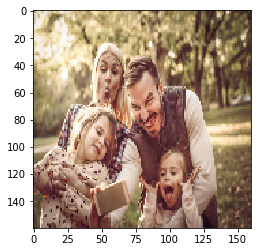

[[5.]]


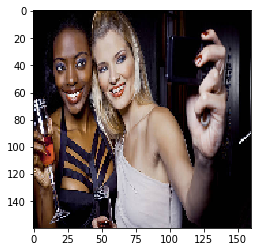

[[3.]]


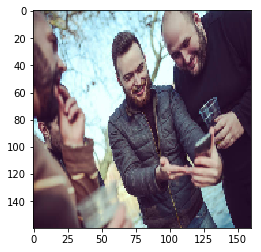

In [78]:
for  i in range (0, 5):
    name = rng.choice(tot)
    img = Xt[name]
    classes = np.array(train.columns[2:])
    proba = model.predict(img.reshape(1,160,160,3))
    print(proba.round())
    plt.imshow(img)
    plt.show()

[[5.]]


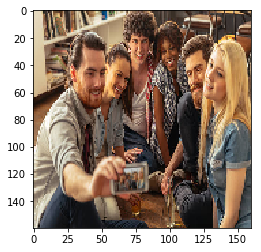

[[4.]]


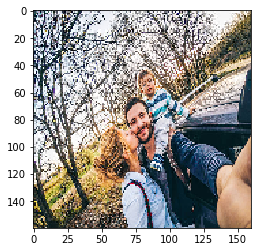

[[3.]]


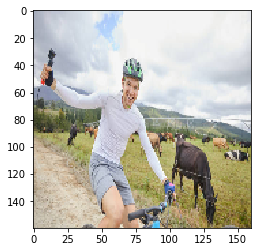

[[5.]]


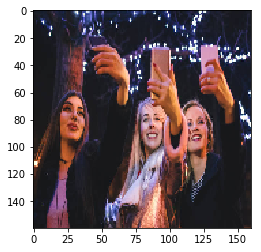

[[3.]]


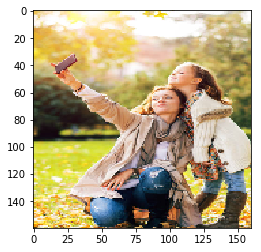

In [79]:
for  i in range (0, 5):
    name = rng.choice(tot)
    img = Xt[name]
    classes = np.array(train.columns[2:])
    proba = model.predict(img.reshape(1,160,160,3))
    print(proba.round())
    plt.imshow(img)
    plt.show()

[[3.]]


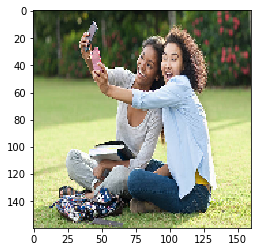

[[4.]]


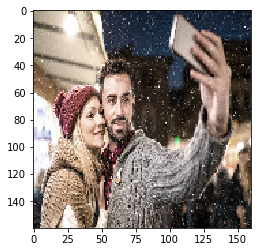

[[3.]]


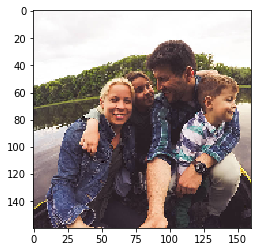

[[3.]]


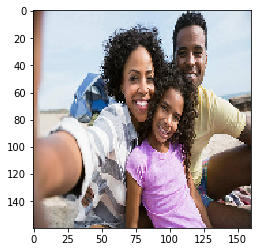

[[6.]]


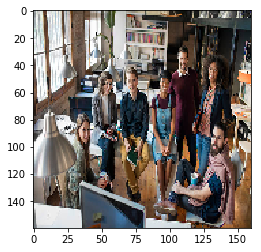

In [86]:
for  i in range (0, 5):
    name = rng.choice(tot)
    img = Xt[name]
    classes = np.array(train.columns[2:])
    proba = model.predict(img.reshape(1,160,160,3))
    print(proba.round())
    plt.imshow(img)
    plt.show()

[[3.]]


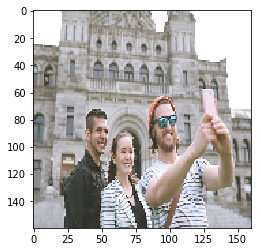

[[5.]]


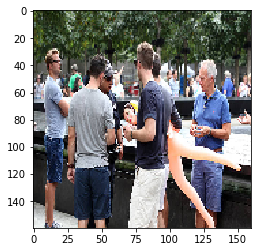

[[3.]]


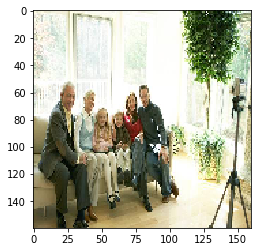

[[4.]]


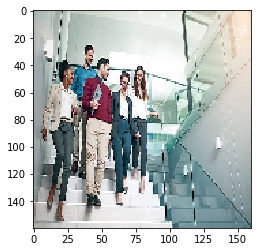

[[3.]]


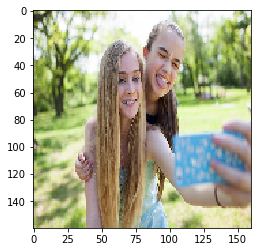

In [81]:
for  i in range (0, 5):
    name = rng.choice(tot)
    img = Xt[name]
    classes = np.array(train.columns[2:])
    proba = model.predict(img.reshape(1,160,160,3))
    print(proba.round())
    plt.imshow(img)
    plt.show()